In [21]:
import xarray as xr
import numpy as np
from scipy.interpolate import interpn, griddata

In [22]:
src_ds = xr.open_dataset('/content/CM_CURIE_POINT_DEPTH_KM_Li2017.5m_EASE9262.68m.nc')
cng_ds = xr.open_dataset('/content/WGM2012_Bouguer_ponc_2min.grd')

src_lat = np.asarray(src_ds.lat.values)
src_lon = np.asarray(src_ds.lon.values)
src_data = np.asarray(src_ds.z.values)

cng_lat = np.asarray(cng_ds['y'].values)  # Replace 'lat' with the actual latitude variable name
cng_lon = np.asarray(cng_ds['x'].values)  # Replace 'lon' with the actual longitude variable name
cng_data = np.asarray(cng_ds['z'].values)

#meshgrid used for interpolation
src_xx, src_yy = np.meshgrid(src_lon, src_lat)

In [23]:
cng_ds

<xarray.Dataset>
Dimensions:  (x: 10801, y: 5401)
Coordinates:
  * x        (x) float32 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0 180.0
  * y        (y) float32 -90.0 -89.97 -89.93 -89.9 ... 89.9 89.93 89.97 90.0
Data variables:
    z        (y, x) float32 11.06 11.06 11.06 11.06 ... 419.2 419.2 419.2 419.2
Attributes:
    Conventions:  COARDS, CF-1.0
    title:        /data/xxgrgs/vales/CARTE_GRAVI/TRACES/BOUGUER_DTU10L/Bougue...
    history:      xyz2grd -V -R-180.0/+180.0/-90.0/+90.0 -I2m /data/xxgrgs/va...
    GMT_version:  4.2.1
    node_offset:  0

In [24]:
src_ds

<xarray.Dataset>
Dimensions:  (lat: 1586, lon: 3750)
Coordinates:
  * lat      (lat) float64 -88.83 -86.9 -85.78 -84.9 ... 84.9 85.78 86.9 88.83
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Data variables:
    z        (lat, lon) float32 nan nan nan nan nan ... 17.69 17.66 17.64 17.63

In [25]:
points = (cng_lat, cng_lon)
coords = (src_yy, src_xx)
interp_cng = interpn(points, cng_data, coords)
interp_cng = interp_cng.reshape(src_xx.shape)

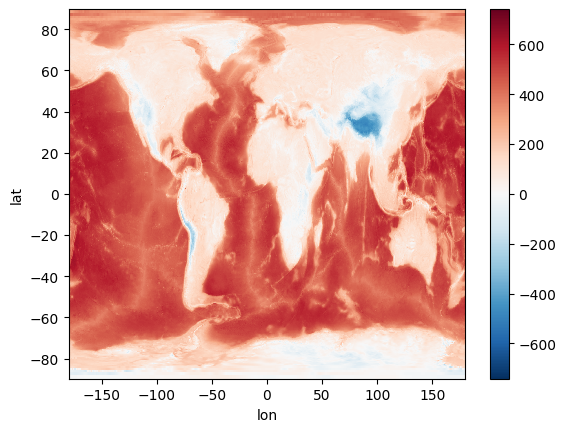

In [27]:
data_array = xr.DataArray(interp_cng, dims=['lat','lon'], coords= {'lat': src_lat, 'lon': src_lon})
data_array.plot()
data_array.to_netcdf('interpolated_bouguer.nc')